In [250]:
# This is Conway's Game of Life with a small amount of randomization.
# Some of this code was modified from:
# http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html
# http://matplotlib.org/1.4.1/examples/animation/basic_example.html

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [247]:
def iterate(Z):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    # Add randomess
    R_1 = (N==1) * (np.random.randint(0,1000, np.array(Z.shape) - np.array([2,2])) == 0)
    R_2 = (N==2) * (np.random.randint(0,1000, np.array(Z.shape) - np.array([2,2])) == 0)
    R_3 = (N==3) * (np.random.randint(0,1000, np.array(Z.shape) - np.array([2,2])) == 0)
    R_4 = (N==4) * (np.random.randint(0,1000, np.array(Z.shape) - np.array([2,2])) == 0)    
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    Z[1:-1,1:-1][R_1] = 1
    Z[1:-1,1:-1][R_2] = 0
    Z[1:-1,1:-1][R_3] = 0
    Z[1:-1,1:-1][R_2] = 1
    return Z

In [248]:
Z = (np.random.randint(0,10,(512,1024)) == 0).astype(int)

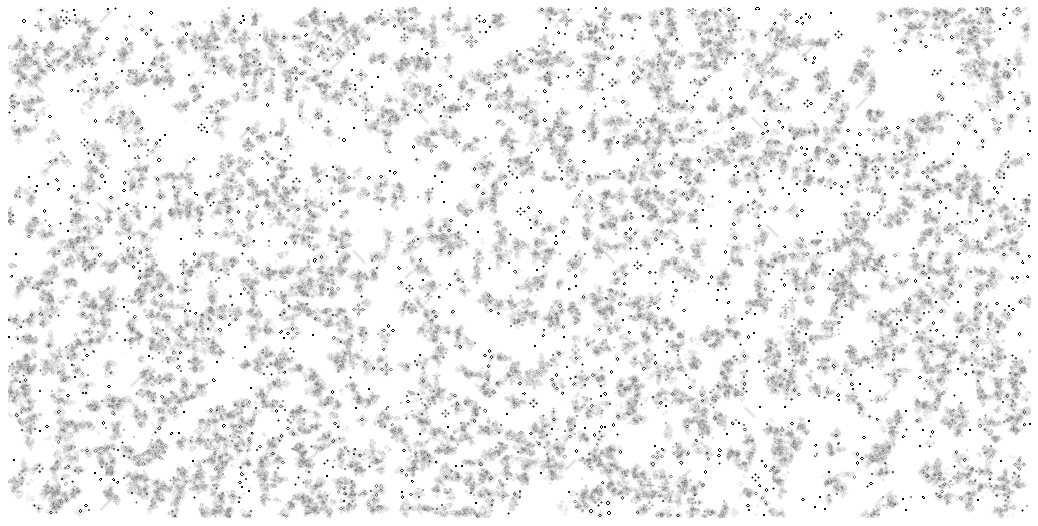

In [249]:
size = np.array(Z.shape)
dpi = 72.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
plt.xticks([]), plt.yticks([])
im = plt.imshow(Z,interpolation='nearest', cmap=plt.cm.gray_r)

ars = []

def iterate_plot(*args):
    global Z
    Z = iterate(Z)
    ars.append(Z.copy())
    if len(ars) > 50:
        ars.pop(0)
    im.set_array(sum(ars) / 50.)
    return im

ani = animation.FuncAnimation(fig, iterate_plot, interval=50, frames=100000)
ani.save('im.mp4', codec="libx264")
plt.show()